In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
import itertools
from astropy.stats import sigma_clipped_stats

In [2]:
zps = pd.read_csv('./plots/zps_grouping_table.csv')
ois = pd.read_csv('./plots/ois_grouping_table.csv')
sps = pd.read_csv('./plots/sps_grouping_table.csv')
hot = pd.read_csv('./plots/hot_grouping_table.csv')

In [3]:
zps['m1_diam'] = 1000*zps['m1_diam']
sps['m1_diam'] = 1000*sps['m1_diam']
hot['m1_diam'] = 1000*hot['m1_diam']
ois['m1_diam'] = 1000*ois['m1_diam']

In [4]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [5]:
len(big_tab)

27

In [6]:
cols = big_tab.columns

b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

b_group_cols = list(cols[1:4])

b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [7]:
cols = hot.columns

test_cols = [col for col in cols if '_test_' in col]
test0_cols = [col for col in cols if '_test0_' in col]

group_cols = list(cols[1:4])

knn_cols = [col for col in cols if col.startswith('knn')]
rfo_cols = [col for col in cols if col.startswith('rfo')]
svc_cols = [col for col in cols if col.startswith('svc')]

f1_cols = [col for col in cols if 'f1' in col]
acc_cols = [col for col in cols if '_acc' in col]
bacc_cols = [col for col in cols if '_bacc' in col]
reca_cols = [col for col in cols if '_reca' in col]
prec_cols = [col for col in cols if '_prec' in col]
aprec_cols = [col for col in cols if '_aprec' in col]

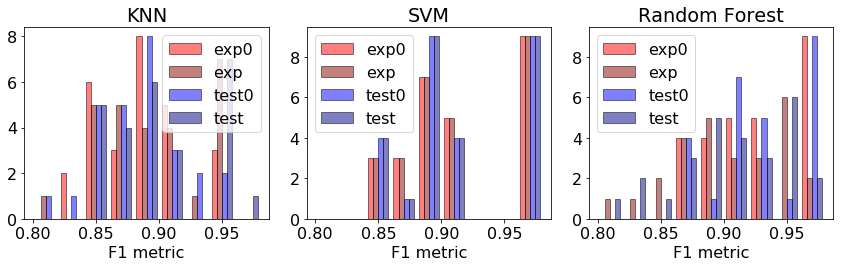

In [199]:
labels=['exp0', 'exp', 'test0', 'test']
colors=['red', 'darkred', 'blue', 'darkblue']

bins = np.arange(0.8, 1., 0.02)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('KNN')
plt.hist([hot['knn_exp0_f1'],hot['knn_exp_f1'],
          hot['knn_test0_f1'], hot['knn_test_f1']],
          alpha=0.5, label=labels, bins=bins, color=colors)
plt.xlabel('F1 metric')
plt.legend(loc='best')

plt.subplot(132)
plt.title('SVM')
plt.hist([hot['svc_exp0_f1'],hot['svc_exp_f1'],
          hot['svc_test0_f1'], hot['svc_test_f1']],
          alpha=0.5, label=labels, bins=bins, color=colors)
plt.xlabel('F1 metric')
plt.legend(loc='best')

plt.subplot(133)
plt.title('Random Forest')
plt.hist([hot['rfo_exp0_f1'],hot['rfo_exp_f1'],
          hot['rfo_test0_f1'], hot['rfo_test_f1']],
          alpha=0.5, label=labels, bins=bins, color=colors)
plt.xlabel('F1 metric')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

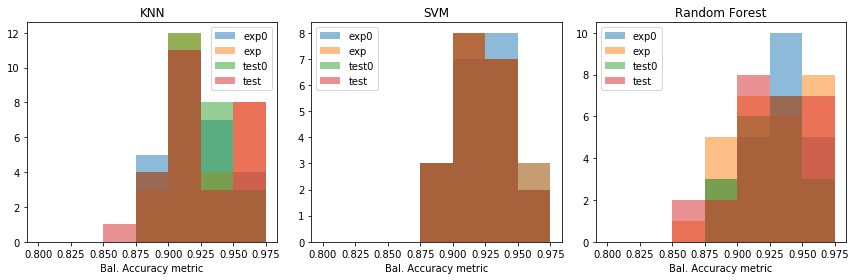

In [9]:
bins = np.arange(0.8, 1., 0.025)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('KNN')
plt.hist(hot['knn_exp0_bacc'],  alpha=0.5, label='exp0',  bins=bins, histtype='bar')
plt.hist(hot['knn_exp_bacc'],   alpha=0.5, label='exp',   bins=bins, histtype='bar')
plt.hist(hot['knn_test0_bacc'], alpha=0.5, label='test0', bins=bins, histtype='bar')
plt.hist(hot['knn_test_bacc'],  alpha=0.5, label='test',  bins=bins, histtype='bar')
plt.xlabel('Bal. Accuracy metric')
plt.legend(loc='best')

plt.subplot(132)
plt.title('SVM')
plt.hist(hot['svc_exp0_bacc'],  alpha=0.5, label='exp0',  bins=bins)
plt.hist(hot['svc_exp_bacc'],   alpha=0.5, label='exp',   bins=bins)
plt.hist(hot['svc_test0_bacc'], alpha=0.5, label='test0', bins=bins)
plt.hist(hot['svc_test_bacc'],  alpha=0.5, label='test',  bins=bins)
plt.xlabel('Bal. Accuracy metric')
plt.legend(loc='best')

plt.subplot(133)
plt.title('Random Forest')
plt.hist(hot['rfo_exp0_bacc'],  alpha=0.5, label='exp0',  bins=bins)
plt.hist(hot['rfo_exp_bacc'],   alpha=0.5, label='exp',   bins=bins)
plt.hist(hot['rfo_test0_bacc'], alpha=0.5, label='test0', bins=bins)
plt.hist(hot['rfo_test_bacc'],  alpha=0.5, label='test',  bins=bins)
plt.xlabel('Bal. Accuracy metric')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

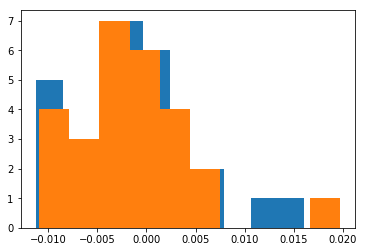

In [10]:
delta0_f1 = hot['knn_exp0_f1'] - hot['knn_test0_f1']
delta_f1 = hot['knn_exp_f1'] - hot['knn_test_f1']
delta0_bacc = hot['knn_exp0_bacc'] - hot['knn_test0_bacc']
delta_bacc = hot['knn_exp_bacc'] - hot['knn_test_bacc']

plt.hist(delta0_f1)
plt.hist(delta_f1)
plt.show()

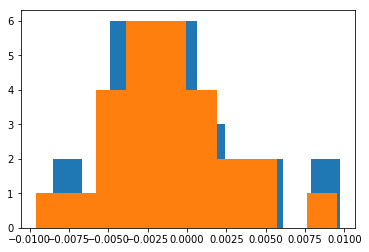

In [11]:
plt.hist(delta0_bacc)
plt.hist(delta_bacc)
plt.show()

In [12]:
non_matrix = [acol for acol in cols if not '_c' in acol]

In [13]:
f1 = [acol for acol in non_matrix if 'f1' in acol]

In [14]:
hot.columns

Index(['Unnamed: 0', 'm1_diam', 'exp_time', 'new_fwhm', 'knn_exp0_c00',
       'knn_exp0_c01', 'knn_exp0_c10', 'knn_exp0_c11', 'knn_exp0_bacc',
       'knn_exp0_acc',
       ...
       'svc_test_c00', 'svc_test_c01', 'svc_test_c10', 'svc_test_c11',
       'svc_test_bacc', 'svc_test_acc', 'svc_test_prec', 'svc_test_aprec',
       'svc_test_reca', 'svc_test_f1'],
      dtype='object', length=124)

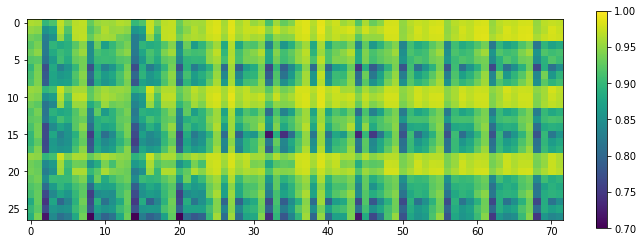

In [15]:
plt.figure(figsize=(12, 4))
plt.imshow(hot[non_matrix[4:]], vmin=0.7, vmax=1.)
plt.colorbar()

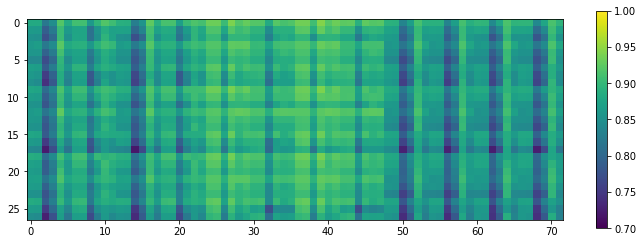

In [16]:
plt.figure(figsize=(12, 4))
plt.imshow(sps[non_matrix[4:]], vmin=0.7, vmax=1.)
plt.colorbar()

In [8]:
f1 = [col for col in b_f1_cols if '_test_' in col]

In [9]:
f1

['knn_test_f1_zps',
 'rfo_test_f1_zps',
 'svc_test_f1_zps',
 'knn_test_f1_ois',
 'rfo_test_f1_ois',
 'svc_test_f1_ois',
 'knn_test_f1',
 'rfo_test_f1',
 'svc_test_f1',
 'knn_test_f1_sps',
 'rfo_test_f1_sps',
 'svc_test_f1_sps']

In [10]:
group_cols

['m1_diam', 'exp_time', 'new_fwhm']

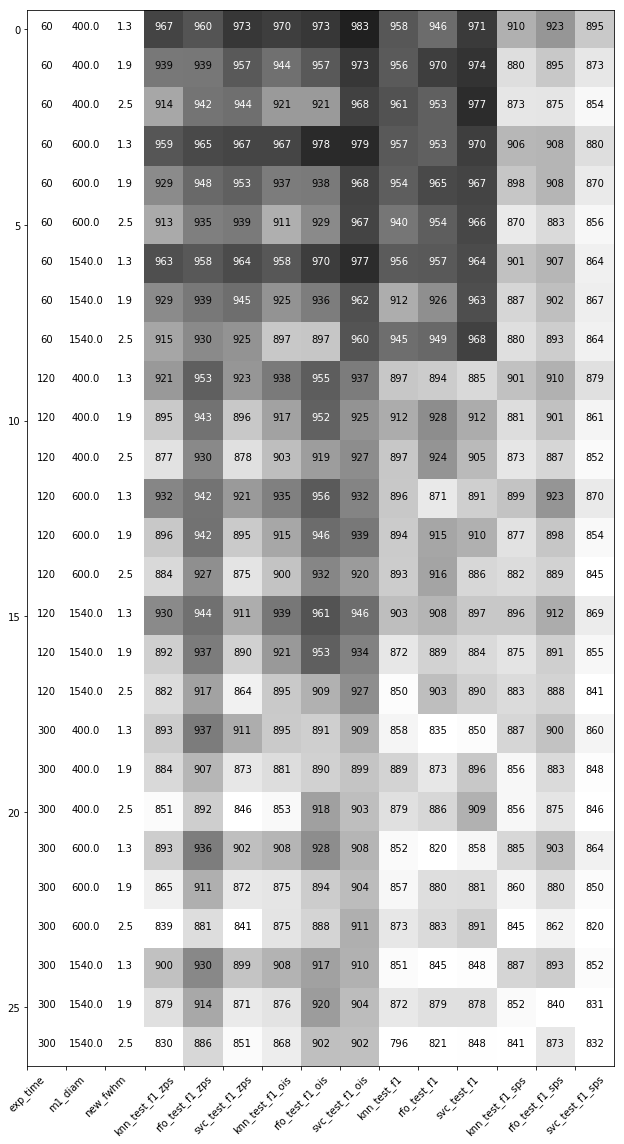

In [26]:
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[1], group_cols[0], group_cols[2]]+f1
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[1], group_cols[0], group_cols[2]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[f1].values)+0.05, vmax=1., interpolation='none', cmap=plt.cm.Greys)
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[f1].values) + np.min(big_tab[f1].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(1000*dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap.svg', format='svg', dpi=780)

In [207]:
import seaborn as sns
sns.set_context(font_scale=12)
plt.rcParams["patch.force_edgecolor"] = True

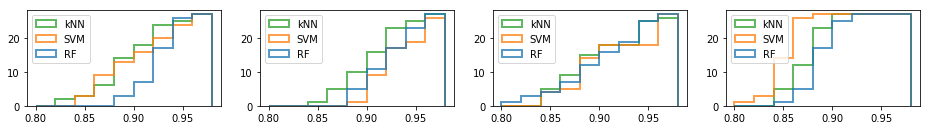

In [54]:
bins = np.arange(0.8, 1., 0.02)
plt.figure(figsize=(16, 6))

plt.subplot(341)
plt.hist([big_tab.rfo_test_f1_zps.values, big_tab.svc_test_f1_zps.values, big_tab.knn_test_f1_zps.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

plt.subplot(342)
plt.hist([big_tab.rfo_test_f1_ois.values, big_tab.svc_test_f1_ois.values, big_tab.knn_test_f1_ois.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

plt.subplot(343)
plt.hist([big_tab.rfo_test_f1.values, big_tab.svc_test_f1.values, big_tab.knn_test_f1.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

plt.subplot(344)
plt.hist([big_tab.rfo_test_f1_sps.values, big_tab.svc_test_f1_sps.values, big_tab.knn_test_f1_sps.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

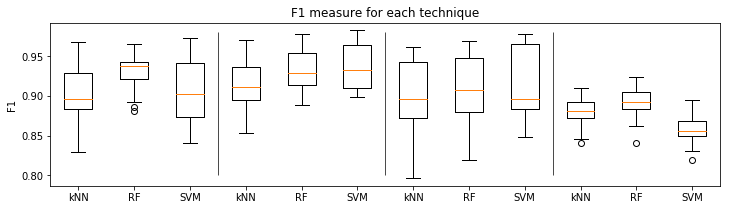

In [96]:
plt.figure(figsize=(12,3))
plt.title('F1 measure for each technique')
plt.boxplot(big_tab[f1].values)
plt.vlines(x=3.5, ymin=0.8, ymax=0.98, lw=0.7)
plt.vlines(x=6.5, ymin=0.8, ymax=0.98, lw=0.7)
plt.vlines(x=9.5, ymin=0.8, ymax=0.98, lw=0.7)
plt.xticks(np.arange(1, 13), ['kNN', 'RF', 'SVM']*4, rotation=0)
plt.ylabel('F1')
plt.savefig('boxplot_f1.pdf', format='pdf', dpi=780)

In [93]:
plt.figure(figsize=(28, 16))
pl_cols = group_cols+f1
dat = ois[pl_cols].values
plt.imshow(dat, vmin=0.7, vmax=1., interpolation='none', cmap=plt.cm.Greys)
tick_marks = np.arange(len(pl_cols))
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = 0.75
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(dat[i, j], '.3f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    else:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()

KeyError: "['knn_test_f1_zps' 'rfo_test_f1_zps' 'svc_test_f1_zps' 'knn_test_f1_ois'\n 'rfo_test_f1_ois' 'svc_test_f1_ois' 'knn_test_f1_sps' 'rfo_test_f1_sps'\n 'svc_test_f1_sps'] not in index"

<Figure size 2016x1152 with 0 Axes>

In [94]:
plt.figure(figsize=(28, 16))
pl_cols = group_cols+f1
dat = sps[pl_cols].values
plt.imshow(dat, vmin=0.7, vmax=1., interpolation='none', cmap=plt.cm.Blues)
tick_marks = np.arange(len(pl_cols))
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = 0.99
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(dat[i, j], '.3f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    else:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()

KeyError: "['knn_test_f1_zps' 'rfo_test_f1_zps' 'svc_test_f1_zps' 'knn_test_f1_ois'\n 'rfo_test_f1_ois' 'svc_test_f1_ois' 'knn_test_f1_sps' 'rfo_test_f1_sps'\n 'svc_test_f1_sps'] not in index"

<Figure size 2016x1152 with 0 Axes>

In [ ]:
plt.figure(figsize=(28, 16))
pl_cols = group_cols+f1
dat = hot[pl_cols].values
plt.imshow(dat, vmin=0.7, vmax=1., interpolation='none', cmap=plt.cm.Blues)
tick_marks = np.arange(len(pl_cols))
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = 0.91
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(dat[i, j], '.3f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    else:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()

We only use the F1 value, and only on the test set...

Now we inspect the confusion matrices

In [164]:
cm_cols = [acol for acol in big_tab.columns if 'test_c' in acol]

In [165]:
knn_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('knn' in col)]].sum().values.reshape(2,2)
rfo_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
svc_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('svc' in col)]].sum().values.reshape(2,2)

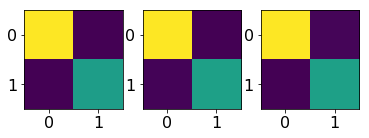

In [166]:
plt.subplot(131)
plt.imshow(knn_cms)
plt.subplot(132)
plt.imshow(rfo_cms)
plt.subplot(133)
plt.imshow(svc_cms)

In [167]:
zps_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
hot_cms = big_tab[['rfo_test_c00', 'rfo_test_c01', 'rfo_test_c10', 'rfo_test_c11']].sum().values.reshape(2,2)
sps_cms = big_tab[[col for col in cm_cols if ('sps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
ois_cms = big_tab[[col for col in cm_cols if ('ois' in col) and ('rfo' in col)]].sum().values.reshape(2,2)

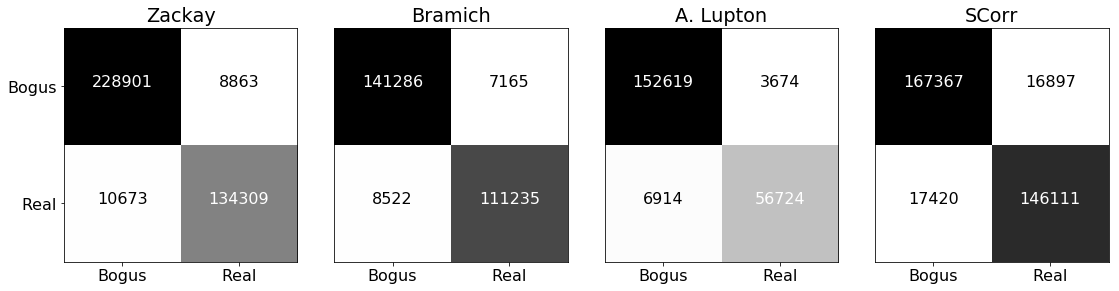

In [168]:
thresh=20000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cms
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cms
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cms
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cms
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)

In [169]:
np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3, 3)[2, 1]

8

In [170]:
np.array([1, 2, 3, 4]).reshape(2, 2)[0, 1]

2

In [180]:
zps = pd.read_csv('./plots_full/zps_grouping_table_rfo.csv')
ois = pd.read_csv('./plots_full/ois_grouping_table_rfo.csv')
sps = pd.read_csv('./plots_full/sps_grouping_table_rfo.csv')
hot = pd.read_csv('./plots_full/hot_grouping_table_rfo.csv')

In [181]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [182]:
len(big_tab)

27

In [183]:
cols = big_tab.columns

b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

b_group_cols = list(cols[1:4])

b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [184]:
zps_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
hot_cms = big_tab[['rfo_test_c00', 'rfo_test_c01', 'rfo_test_c10', 'rfo_test_c11']].sum().values.reshape(2,2)
sps_cms = big_tab[[col for col in cm_cols if ('sps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
ois_cms = big_tab[[col for col in cm_cols if ('ois' in col) and ('rfo' in col)]].sum().values.reshape(2,2)

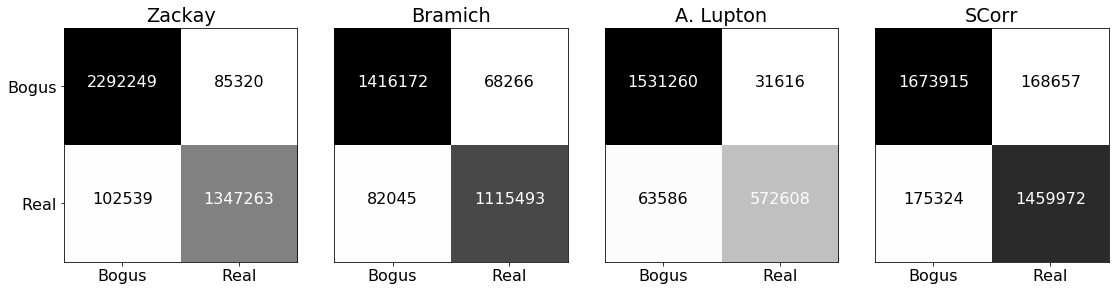

In [190]:
thresh=200000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cms
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cms
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cms
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cms
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)